# Linear Regression

This notebook shows how to use linear regression using the Scikit-learn package.

The exercise will use artificial data created as part of the exercise to illustrate the methods.

## Imports and setup
First, we need to import the relevant packages. 
This exercise uses:
   * The Normal (Gaussian) Distribution from SciPy
   * Linear Regression from Scikit-Learn
   * Regularisation from Scikit-Learn
   
Though we still use Python 2.7 here, it is handy to import a few changes from Python 3.x to future-proof the code

In [12]:
# ensure that 1/2==0.5
from __future__ import division, print_function


%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# imports
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, Ridge, RidgeCV

Populating the interactive namespace from numpy and matplotlib


/home/uke/VirtualEnvs/PandasEnv/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Generate artificial data

Define a small function which generates test data according to a linear model in the following way:
   * x-axis: Random numbers drawn from a Gaussian (Normal) distribution with default parameters (mean=0, sigma = 1)
   * y-axis: x-value times slope plus a noise term (Gaussian random numbers)
   
The input parameters to this function are:
   * The number of samples to generate
   * slope
   * noise

The output of the function is:
  * array of x values
  * array of y values

In [5]:
def generate_test_data(slope, noise, n_samples):
    x = norm.rvs(size=n_samples)
    y = slope * x + norm.rvs(scale=noise, size=n_samples)
    return x[:, np.newaxis], y

Test the function generating artificial data by:
   * generate 100 samples with slope 1.0 and noise 1.0
   * create a scatterplot of x vs y values
   * create a histogram of the marginal distributions, i.e. of the x and y vlaues

In [19]:
true_slope = 1.0
noise_level = 1
n_samples = 100

x, y = generate_test_data(true_slope, noise_level, n_samples)

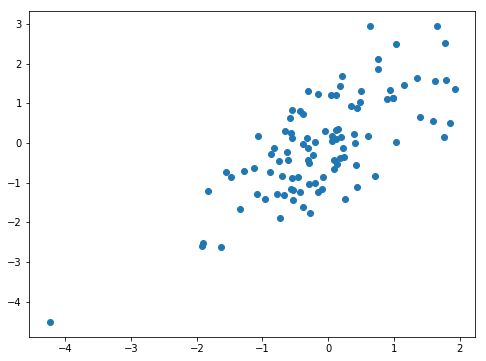

In [20]:
#show the generated sample
plt.scatter(x,y)
plt.show()

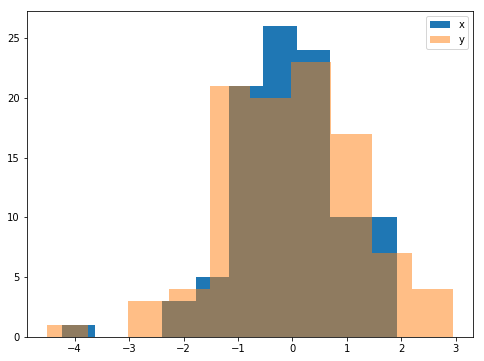

In [21]:
# now show the distribution of data in x and y 
plt.hist(x, label='x')
plt.hist(y, alpha = 0.5, label='y')
plt.legend()
plt.show()

# Linear Regression (OLS)

Use the LinearRegression method from Scikit-Learn to fit a linear model to the artificial data.
In a first step, set ```fit_intercept=False```.

   * Print the regression coefficient you have obtained
   * Draw a scatter-plot of the artificial data and add the true linear model (according to which the artificial data was created) and the result of the linear regression.


[array([ 0.95975387]), 0.0]


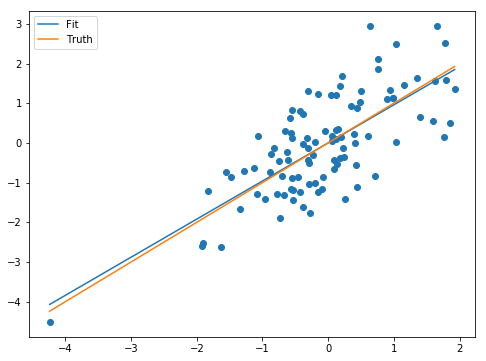

In [22]:
lm = LinearRegression(fit_intercept=False)
lm.fit(x,y)
print([lm.coef_, lm.intercept_])

plt.scatter(x,y)
x_space = np.linspace(np.min(x), np.max(x))
plt.plot(x_space, lm.predict(x_space[:, np.newaxis]), label='Fit')
plt.plot(x_space, true_slope*x_space, label='Truth')
plt.legend()
plt.show()

## Outlier

Evaluate what happens if one extreme outlier is added to the dataset.
   * Copy the x and y data into new arrays
   * Append an extreme outlier, e.g. x = 2.0, y = -50.0

Repeat fit:
   * Perform the linear regression on the new dataset
   * Visualise the data via a scatter plot
   * Add the true linear model
   * Add the fitted regression model (limit the y scale to the same range as without the outlier to illustrate the effect)

In [23]:
x_1=np.append(x,[2.0])
y_1=np.append(y,[-50.0])


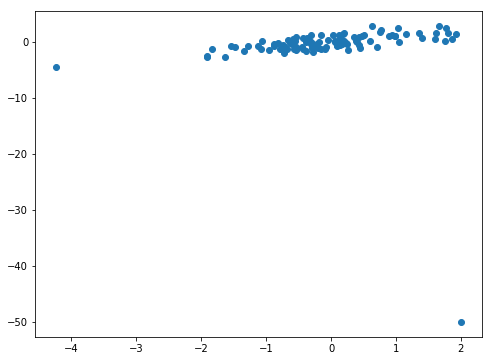

In [24]:
plt.scatter(x_1,y_1)
plt.show()

[array([[-0.09872404]]), 0.0]


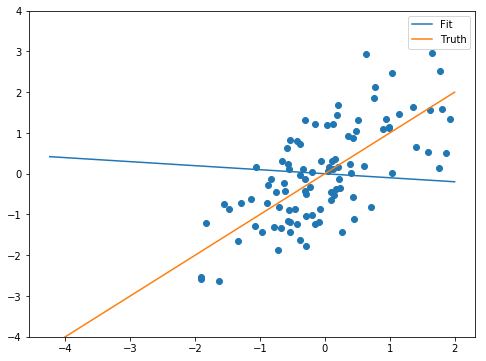

In [25]:
lm = LinearRegression(fit_intercept=False)
lm.fit(x_1.reshape(-1,1),y_1.reshape(-1,1))
print([lm.coef_, lm.intercept_])

plt.scatter(x_1,y_1)
x_space = np.linspace(np.min(x_1), np.max(x_1))
plt.plot(x_space, lm.predict(x_space[:, np.newaxis]), label='Fit')
plt.plot(x_space, true_slope*x_space, label='Truth')
plt.ylim(-4.0,4)
plt.legend()
plt.show()

The fit is notably worse - the bulk of the data is no longer described correctly because the single outlier had too much influence on the fit. In many real-life examples it would be less obvious.




# Regularised Linear Regression

This section focuses on two regularisation methods for linear regression (see lecture)
   * Lasso Regression
   * Ridge Regression
   
In order to investigate the effect, create a "toy" experiment with 1000 experiments:
   * Choose 3 values for the slope of the linear model (e.g. 0.0, 0.2, 2.0)
   * Generate 100 artificial x,y data samples using the function at the beginning with this slope
   * Perform a Lasso and a Ridge regression and save the coefficients returned from the fit. Use a regularisation parameter ```alpha=0.1``` for now
   * Repeat this process 1000 times, such that you have 1000 values for regularised regression for 3 different values of the slope

In [13]:
coefs_lasso = []
coefs_ridge = []

for en, slope in enumerate([0.0, 0.2, 2.0]):
    coefs_lasso.append([])
    coefs_ridge.append([])
    for _ in range(1000):
        x, y = generate_test_data(slope, 1, 100)
        lasso = Lasso(fit_intercept=False, alpha=0.1)
        lasso.fit(x, y)
        coefs_lasso[en].append(lasso.coef_)    
        ridge = Ridge(fit_intercept=False, alpha=0.1)
        ridge.fit(x,y)
        coefs_ridge[en].append(ridge.coef_[0])   

Visualise the 3 histograms for the coefficients returned by the regularised linear regression for the 3 values of the slope

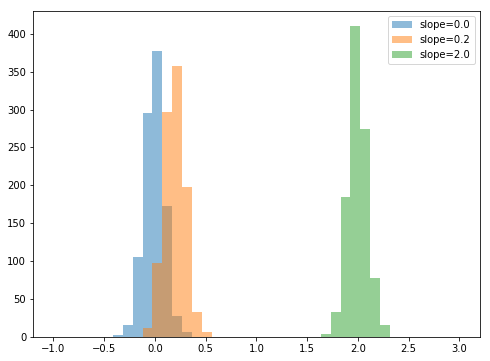

In [14]:
plt.hist(coefs_ridge[0], bins=np.linspace(-1,3,42), alpha=0.5, label='Ridge - slope=0.0')
plt.hist(coefs_ridge[1], bins=np.linspace(-1,3,42), alpha=0.5, label='Ridge - slope=0.2')
plt.hist(coefs_ridge[2], bins=np.linspace(-1,3,42), alpha=0.5, label='Ridge - slope=2.0')
plt.legend()
plt.show()

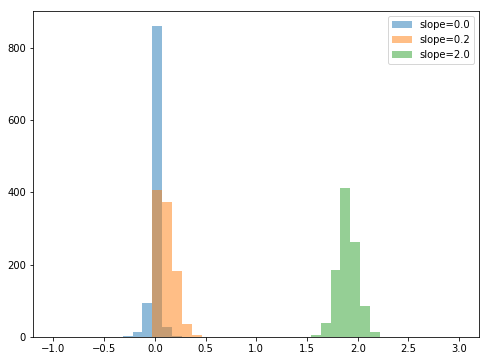

In [15]:
plt.hist(coefs_lasso[0], bins=np.linspace(-1,3,42), alpha=0.5, label='Lasso - slope=0.0')
plt.hist(coefs_lasso[1], bins=np.linspace(-1,3,42), alpha=0.5, label='Lasso - slope=0.2')
plt.hist(coefs_lasso[2], bins=np.linspace(-1,3,42), alpha=0.5, label='Lasso - slope=2.0')
plt.legend()
plt.show()

Compare the histograms of the coefficients for one slope (e.g. 0.0) for Ridge and Lasso regression.

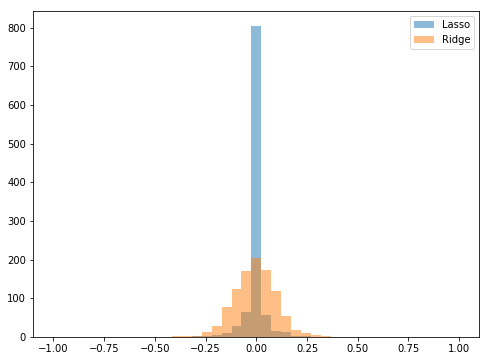

In [26]:
plt.hist(coefs_lasso[0], bins=np.linspace(-1,1,42), alpha=0.5, label='Lasso')
plt.hist(coefs_ridge[0], bins=np.linspace(-1,1,42), alpha=0.5, label='Ridge')
plt.legend()
plt.show()

## Regularisation parameter

So far we left the regularisation parameter ```alpha=0.1``` (where ```alpha=0.0``` corresponds to the unregularised linear regression or ordinary least squares).

Now investigate the effect of the regularisation constant
   * Choose a fixed value for the slope for all experiments, e.g. 0.2
   * Choose a value ```alpha``` for the regularisation constant (e.g. 4 values evenly spaced in log-space ```alphas = np.logspace(-2,0,4)```
   * Perform 1000 "toy" experiments with this choice
   * In each experiment, generate 100 artificial x,y data points for the true linear model
   * Perform a Lasso fit and record the coefficients returned from the fit
   * Plot the distribution fo coefficients for the different choices of the regularisation constant ```alpha```

In [27]:
coefs = []
alphas = np.logspace(-2,0,4)
for en, alpha in enumerate(alphas):
    coefs.append([])
    for _ in range(1000):
        x, y = generate_test_data(0.2, 1, 100)
        lasso = Lasso(fit_intercept=False, alpha=alpha)
        lasso.fit(x, y)
        coefs[en].append(lasso.coef_)   

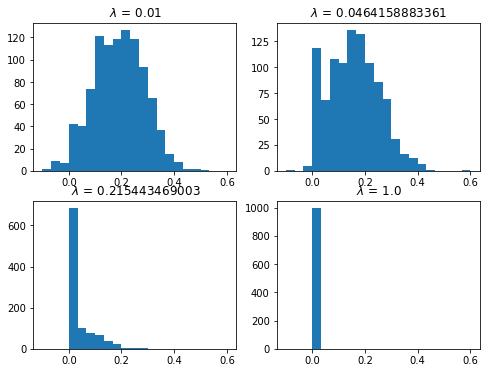

In [28]:
fig = plt.figure()
for en, coef in enumerate(coefs):
    ax = fig.add_subplot(221+en)
    ax.hist(coef, bins=np.linspace(-.1,.6,22))
    ax.set_title(" $\lambda$ = {} ".format( alphas[en]))
plt.show()

# Outlier with Lasso or Ridge regression

Use the same data from earlier to investigate whether Lasso or Ridge regression would help make the fit robust against extreme outliers. Experiement with different values of the regularisation constant.
Is it possible to come close to the true model, according to which the data have been generated?

[array([[-0.09872404]]), 0.0]


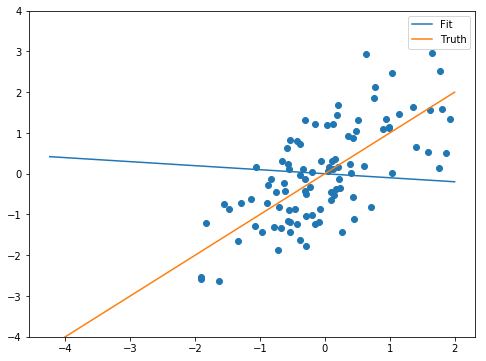

In [43]:
lm = LinearRegression(fit_intercept=False)
lm.fit(x_1.reshape(-1,1),y_1.reshape(-1,1))
print([lm.coef_, lm.intercept_])

plt.scatter(x_1,y_1)
x_space = np.linspace(np.min(x_1), np.max(x_1))
plt.plot(x_space, lm.predict(x_space[:, np.newaxis]), label='Fit')
plt.plot(x_space, true_slope*x_space, label='Truth')
plt.ylim(-4.0,4)
plt.legend()
plt.show()

Lasso coefficient -0.0
Ridge coefficient [[-0.09822342]]


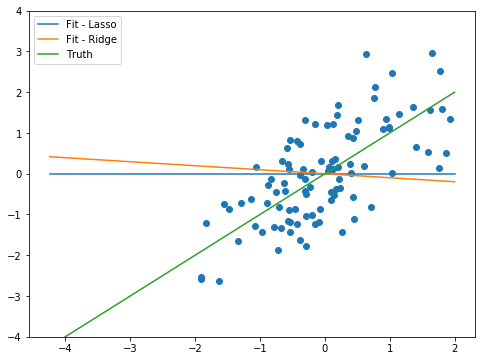

In [53]:
alpha = 0.5

lasso = Lasso(fit_intercept=False, alpha=alpha)
lasso.fit(x_1.reshape(-1,1), y_1.reshape(-1,1))
print('Lasso coefficient {}'.format(lasso.coef_)    )

ridge = Ridge(fit_intercept=False, alpha=alpha)
ridge.fit(x_1.reshape(-1,1),y_1.reshape(-1,1))
print('Ridge coefficient {}'.format(ridge.coef_)   )

plt.scatter(x_1,y_1)
x_space = np.linspace(np.min(x_1), np.max(x_1))
plt.plot(x_space, lasso.predict(x_space[:, np.newaxis]), label='Fit - Lasso')
plt.plot(x_space, ridge.predict(x_space[:, np.newaxis]), label='Fit - Ridge')
plt.plot(x_space, true_slope*x_space, label='Truth')
plt.ylim(-4.0,4)
plt.legend()
plt.show()